In [5]:
!pip install --user torch matplotlib numpy pandas tqdm

  Using cached torch-2.2.0-cp310-cp310-manylinux1_x86_64.whl.metadata (25 kB)
  Using cached tqdm-4.66.2-py3-none-any.whl.metadata (57 kB)
  Using cached filelock-3.13.1-py3-none-any.whl.metadata (2.8 kB)
  Using cached sympy-1.12-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.2.1-py3-none-any.whl.metadata (5.2 kB)
  Using cached fsspec-2024.2.0-py3-none-any.whl.metadata (6.8 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.

In [2]:
# !pip install --user magic-impute

In [6]:
import argparse
import time
import warnings

# tools
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import magic
from tqdm import tqdm

In [7]:
sc_imputation = True
input_path="."

# Load Demo Data

In [10]:
test_file = "Seurat_geneExpr.csv"

In [11]:
geneExprDemo = pd.read_csv(
            input_path + '/' + test_file,
            index_col=0)
geneExprDemo = geneExprDemo.T
geneExgeneExprDemopr1 = geneExprDemo * 1.0

In [12]:
geneExprDemo

,ALDOC,MAOA,ASS1,AHCYL2,FUT4,GSTP1,PGM1,PECR,AUH,ALAS1,...,POMT2,GMPS,ALDOB,HKDC1,NME3,UAP1,DHODH,COQ2,MAT2A,SLC2A11
Cy72_CD45_H02_S758_comb,0.000000,0.00000,519.368337,3.710014,0.000000,0.000000,0.000000,4.479984,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,5.909958,0.000000,0.000000,0.000000
CY58_1_CD45_B02_S974_comb,0.000000,0.00000,0.000000,0.000000,0.000000,1911.248069,0.000000,0.000000,0.000000,0.000000,...,0.0,804.306493,0.0,0.000000,0.000000,0.000000,3.239971,0.000000,1299.979114,0.000000
Cy71_CD45_D08_S524_comb,0.000000,0.00000,0.000000,0.000000,1.769965,2146.577870,0.000000,0.000000,0.000000,0.000000,...,0.0,199.662945,0.0,0.000000,0.000000,0.000000,1.919965,0.000000,297.710123,0.000000
Cy81_FNA_CD45_B01_S301_comb,41.468866,0.00000,0.000000,0.000000,0.000000,700.616854,4.100047,10.840646,92.581595,0.000000,...,0.0,0.000000,0.0,2.579983,69.839351,78.642588,68.909555,0.000000,18.720881,0.000000
Cy80_II_CD45_B07_S883_comb,0.000000,39.45101,0.000000,0.000000,2.679958,1810.385261,64.958911,38.500513,34.361249,31.459422,...,0.0,65.401854,0.0,0.000000,0.000000,30.730231,0.000000,0.000000,137.905111,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CY75_1_CD45_CD8_1__S25_comb,0.000000,0.00000,0.000000,0.000000,0.227411,273.209941,0.000000,0.000000,0.000000,3.774214,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,6.929273,0.000000,0.000000,0.000000
CY75_1_CD45_CD8_7__S223_comb,0.000000,0.00000,0.000000,0.000000,0.004999,0.000000,0.000000,3.542555,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,42.626885,611.421392,14.830271,2.194241
CY75_1_CD45_CD8_1__S65_comb,0.000000,0.00000,0.000000,0.000000,0.625443,0.000000,0.000000,5.416337,68.925965,1.627573,...,0.0,0.000000,0.0,0.000000,19.659618,0.000000,12.508969,0.000000,0.000000,0.000000
CY75_1_CD45_CD8_1__S93_comb,5.559546,0.00000,0.000000,1.122029,0.658327,571.456758,0.000000,3.564633,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,4.539624,0.000000,0.000000,1.562874


In [13]:
geneExprDemo.dtypes

ALDOC      float64
MAOA       float64
ASS1       float64
AHCYL2     float64
FUT4       float64
            ...   
UAP1       float64
DHODH      float64
COQ2       float64
MAT2A      float64
SLC2A11    float64
Length: 569, dtype: object

In [14]:
min_value = geneExprDemo.min(numeric_only=True).min()
max_value = geneExprDemo.max(numeric_only=True).max()

print("The overall range of values in the geneExpr2 dataframe is:", min_value, "to", max_value)

The overall range of values in the geneExpr2 dataframe is: 0.0 to 65160.3487492029


# Load AD Data

In [15]:
test_file = "counts_AD.csv"

In [16]:
geneExprAD = pd.read_csv(
            input_path + '/' + test_file,
            index_col=0)
geneExprAD = geneExprAD.T
geneExprAD = geneExprAD * 1.0

In [17]:
geneExprAD

,Xkr4,Rp1,Sox17,Mrpl15,Lypla1,Gm37988,Tcea1,Rgs20,Atp6v1h,Oprk1,...,Tnmd,Prkag2os1,RP24-177G14.2,RP23-344G21.5,Gm11417,Hmga1-rs1,Gpr151,Adamts19,Gm17732,Vwce
wt_sn_AAACCTGAGACCCACC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
wt_sn_AAACCTGAGAGTAAGG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
wt_sn_AAACCTGAGCGATGAC-1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
wt_sn_AAACCTGAGTCAAGCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
wt_sn_AAACCTGAGTGACATA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ad_cor_TTTGTCAGTTAAGAAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ad_cor_TTTGTCAGTTCAGCGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ad_cor_TTTGTCAGTTGTACAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ad_cor_TTTGTCATCATAGCAC-1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
geneExprAD.dtypes

Xkr4         float64
Rp1          float64
Sox17        float64
Mrpl15       float64
Lypla1       float64
              ...   
Hmga1-rs1    float64
Gpr151       float64
Adamts19     float64
Gm17732      float64
Vwce         float64
Length: 19390, dtype: object

In [19]:
min_value = geneExprAD.min(numeric_only=True).min()
max_value = geneExprAD.max(numeric_only=True).max()

print("The overall range of values in the geneExprAD dataframe is:", min_value, "to", max_value)

The overall range of values in the geneExprAD dataframe is: 0.0 to 946.0


# Format Demo Data

In [20]:
if sc_imputation == True:
    magic_operator = magic.MAGIC()
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        geneExprDemo = magic_operator.fit_transform(geneExprDemo)

Calculating MAGIC...
  Running MAGIC on 4486 cells and 569 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.36 seconds.
    Calculating KNN search...
    Calculated KNN search in 2.00 seconds.
    Calculating affinities...
    Calculated affinities in 2.05 seconds.
  Calculated graph and diffusion operator in 4.43 seconds.
  Calculating imputation...
  Calculated imputation in 0.10 seconds.
Calculated MAGIC in 4.54 seconds.


In [21]:
geneExprDemo

,ALDOC,MAOA,ASS1,AHCYL2,FUT4,GSTP1,PGM1,PECR,AUH,ALAS1,...,POMT2,GMPS,ALDOB,HKDC1,NME3,UAP1,DHODH,COQ2,MAT2A,SLC2A11
Cy72_CD45_H02_S758_comb,16.917667,0.304546,26.383498,3.282636,1.828532,151.801139,14.921610,22.494897,8.358926,12.038309,...,1.241964,32.067099,1.664187,2.171576,20.083144,9.022107,14.464839,8.584020,105.699309,6.441069
CY58_1_CD45_B02_S974_comb,29.660828,0.660555,9.357048,3.701686,1.725191,518.331310,15.418393,27.269994,12.189061,27.901684,...,1.913756,60.049486,0.379851,2.288121,41.245377,15.546736,14.113357,12.004065,149.479685,6.768907
Cy71_CD45_D08_S524_comb,36.064013,1.850540,6.242428,8.481341,0.794004,1586.445182,61.825495,22.180251,20.526772,32.161325,...,5.864605,63.019106,0.049687,1.825006,37.544843,50.635277,20.679472,9.048489,157.616589,5.560127
Cy81_FNA_CD45_B01_S301_comb,30.780809,2.872553,12.132551,4.847691,0.993526,702.103465,89.593771,23.812144,13.838800,61.872434,...,3.184766,71.977403,0.020718,8.519991,63.339701,95.004382,17.251551,15.101620,197.303113,7.035834
Cy80_II_CD45_B07_S883_comb,129.772620,4.400730,3.521630,13.543003,1.141291,2041.029895,109.030658,13.739812,16.865690,35.615799,...,6.128619,62.534039,0.007082,0.474743,65.143613,44.751645,12.252435,11.025367,165.742254,6.567435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CY75_1_CD45_CD8_1__S25_comb,54.782365,3.809857,14.186762,5.056274,1.237877,556.028703,71.384639,12.154726,15.444673,45.429263,...,1.658571,74.650712,0.070790,1.295610,36.898700,83.097152,13.967112,14.399641,194.712449,4.656847
CY75_1_CD45_CD8_7__S223_comb,28.447477,1.485769,11.285018,6.987158,1.967818,206.974001,19.425309,15.305266,16.618264,21.936583,...,1.108968,38.968419,0.678343,2.005478,44.394754,14.821324,15.736735,37.335819,106.628007,6.167201
CY75_1_CD45_CD8_1__S65_comb,45.655464,1.099126,12.865037,1.887157,2.519701,170.239479,25.230045,23.116234,30.455097,53.598994,...,0.566959,47.838178,0.066420,1.801663,56.710021,12.793872,24.128414,15.466202,151.962728,5.781579
CY75_1_CD45_CD8_1__S93_comb,22.006306,0.519738,9.109587,3.693309,3.763970,183.471264,24.815690,13.880018,10.824020,16.628064,...,0.885209,47.465957,0.281561,1.815260,51.840037,18.602709,16.027342,19.767580,166.273783,7.630090


In [22]:
geneExprDemo.dtypes

ALDOC      float64
MAOA       float64
ASS1       float64
AHCYL2     float64
FUT4       float64
            ...   
UAP1       float64
DHODH      float64
COQ2       float64
MAT2A      float64
SLC2A11    float64
Length: 569, dtype: object

In [23]:
if geneExprDemo.max().max() > 50:
    geneExprDemo = (geneExprDemo + 1).apply(np.log2)  

In [24]:
print(geneExprDemo.describe())

             ALDOC         MAOA         ASS1       AHCYL2         FUT4  \
count  4486.000000  4486.000000  4486.000000  4486.000000  4486.000000   
mean      5.308092     1.252090     3.036067     2.787468     1.520011   
std       0.747972     0.763749     1.083348     1.067545     0.474077   
min       3.156221     0.055226     0.078196     1.143032     0.236605   
25%       4.818109     0.610256     2.397667     2.057982     1.244372   
50%       5.215782     1.127374     3.380292     2.357684     1.565081   
75%       5.702824     1.751772     3.745656     3.286194     1.795789   
max       8.102692     4.311503     6.638905     6.156029     5.128050   

             GSTP1         PGM1         PECR          AUH        ALAS1  ...  \
count  4486.000000  4486.000000  4486.000000  4486.000000  4486.000000  ...   
mean      8.622774     5.027649     4.280052     3.895591     4.720620  ...   
std       1.445015     0.799957     0.449224     0.603972     0.713611  ...   
min       6.07367

In [25]:
geneExprDemo.to_pickle('geneExprDemo.pkl')

In [26]:
geneExprDemo_transformed = geneExprDemo.sum(axis=1)
stand = geneExprDemo_transformed.mean()
geneExprDemo_transformed = geneExprDemo_transformed / stand

In [27]:
geneExprDemo_transformed

Cy72_CD45_H02_S758_comb         0.932791
CY58_1_CD45_B02_S974_comb       0.986643
Cy71_CD45_D08_S524_comb         1.084050
Cy81_FNA_CD45_B01_S301_comb     1.133944
Cy80_II_CD45_B07_S883_comb      1.077561
                                  ...   
CY75_1_CD45_CD8_1__S25_comb     1.105259
CY75_1_CD45_CD8_7__S223_comb    0.997478
CY75_1_CD45_CD8_1__S65_comb     1.017596
CY75_1_CD45_CD8_1__S93_comb     0.987169
CY75_1_CD45_CD8_1__S76_comb     0.997779
Length: 4486, dtype: float64

(array([   7.,   30.,  280.,  939., 1036.,  835.,  637.,  405.,  257.,
          60.]),
 array([0.844671  , 0.87466155, 0.90465209, 0.93464264, 0.96463319,
        0.99462374, 1.02461429, 1.05460483, 1.08459538, 1.11458593,
        1.14457648]),
 <BarContainer object of 10 artists>)

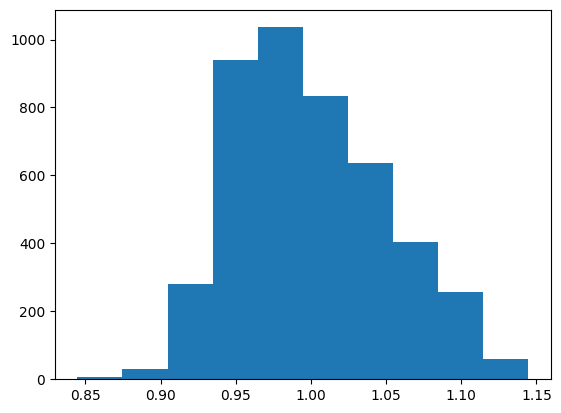

In [28]:
plt.hist(geneExprDemo_transformed)

In [29]:
geneExprDemo_transformed.to_pickle('geneExprDemo_transformed.pkl')


# Format AD Data

In [30]:
if sc_imputation == True:
    magic_operator = magic.MAGIC(solver='approximate')  # Use the 'approximate' solver
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        geneExprAD = magic_operator.fit_transform(geneExprAD)

Calculating MAGIC...
  Running MAGIC on 14501 cells and 19390 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 13.75 seconds.
    Calculating KNN search...
    Calculated KNN search in 10.76 seconds.
    Calculating affinities...
    Calculated affinities in 10.72 seconds.
  Calculated graph and diffusion operator in 35.51 seconds.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 36.64 seconds.


In [31]:
geneExprAD

,Xkr4,Rp1,Sox17,Mrpl15,Lypla1,Gm37988,Tcea1,Rgs20,Atp6v1h,Oprk1,...,Tnmd,Prkag2os1,RP24-177G14.2,RP23-344G21.5,Gm11417,Hmga1-rs1,Gpr151,Adamts19,Gm17732,Vwce
wt_sn_AAACCTGAGACCCACC-1,0.001601,2.402533e-15,-0.000567,0.028931,0.017446,-3.893311e-16,0.027718,0.009637,0.132724,0.040432,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
wt_sn_AAACCTGAGAGTAAGG-1,0.002802,-5.458547e-15,-0.000059,0.018250,0.013306,-2.460991e-16,0.025646,0.009076,0.099213,0.044152,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
wt_sn_AAACCTGAGCGATGAC-1,0.005617,-4.221228e-15,0.000614,0.028709,0.015843,4.881952e-16,0.032567,0.005642,0.119160,0.034567,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
wt_sn_AAACCTGAGTCAAGCG-1,0.005746,-9.606460e-16,0.000748,0.038354,0.024872,7.179613e-16,0.046234,0.008212,0.168266,0.019521,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
wt_sn_AAACCTGAGTGACATA-1,0.002815,1.583247e-15,-0.000646,0.026673,0.017812,-4.358909e-16,0.031162,0.010940,0.128901,0.041100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ad_cor_TTTGTCAGTTAAGAAC-1,0.004796,5.861711e-15,0.000827,0.027072,0.014163,7.879117e-16,0.036374,0.005691,0.109930,0.018433,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ad_cor_TTTGTCAGTTCAGCGC-1,0.004432,-5.417691e-14,0.035614,0.046303,0.018690,5.474844e-16,0.044569,0.014859,0.078602,-0.000432,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ad_cor_TTTGTCAGTTGTACAC-1,0.000935,-3.166069e-14,0.022243,0.030649,-0.000358,-6.714343e-15,0.046511,0.008643,0.081303,-0.008844,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ad_cor_TTTGTCATCATAGCAC-1,0.004295,2.987653e-14,0.002011,0.045842,0.029014,1.091953e-16,0.047940,0.008565,0.184773,0.010207,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
geneExprAD[geneExprAD < 0] = 0
geneExprAD

,Xkr4,Rp1,Sox17,Mrpl15,Lypla1,Gm37988,Tcea1,Rgs20,Atp6v1h,Oprk1,...,Tnmd,Prkag2os1,RP24-177G14.2,RP23-344G21.5,Gm11417,Hmga1-rs1,Gpr151,Adamts19,Gm17732,Vwce
wt_sn_AAACCTGAGACCCACC-1,0.001601,2.402533e-15,0.000000,0.028931,0.017446,0.000000e+00,0.027718,0.009637,0.132724,0.040432,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
wt_sn_AAACCTGAGAGTAAGG-1,0.002802,0.000000e+00,0.000000,0.018250,0.013306,0.000000e+00,0.025646,0.009076,0.099213,0.044152,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
wt_sn_AAACCTGAGCGATGAC-1,0.005617,0.000000e+00,0.000614,0.028709,0.015843,4.881952e-16,0.032567,0.005642,0.119160,0.034567,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
wt_sn_AAACCTGAGTCAAGCG-1,0.005746,0.000000e+00,0.000748,0.038354,0.024872,7.179613e-16,0.046234,0.008212,0.168266,0.019521,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
wt_sn_AAACCTGAGTGACATA-1,0.002815,1.583247e-15,0.000000,0.026673,0.017812,0.000000e+00,0.031162,0.010940,0.128901,0.041100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ad_cor_TTTGTCAGTTAAGAAC-1,0.004796,5.861711e-15,0.000827,0.027072,0.014163,7.879117e-16,0.036374,0.005691,0.109930,0.018433,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ad_cor_TTTGTCAGTTCAGCGC-1,0.004432,0.000000e+00,0.035614,0.046303,0.018690,5.474844e-16,0.044569,0.014859,0.078602,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ad_cor_TTTGTCAGTTGTACAC-1,0.000935,0.000000e+00,0.022243,0.030649,0.000000,0.000000e+00,0.046511,0.008643,0.081303,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ad_cor_TTTGTCATCATAGCAC-1,0.004295,2.987653e-14,0.002011,0.045842,0.029014,1.091953e-16,0.047940,0.008565,0.184773,0.010207,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
if geneExprAD.max().max() > 50:
    geneExprAD = (geneExprAD + 1).apply(np.log2)  

In [34]:
print(geneExprAD.describe())

               Xkr4           Rp1         Sox17        Mrpl15        Lypla1  \
count  14501.000000  1.450100e+04  14501.000000  14501.000000  14501.000000   
mean       0.005647  1.273968e-14      0.003153      0.042808      0.027185   
std        0.003182  2.853024e-14      0.013874      0.011623      0.008668   
min        0.000000  0.000000e+00      0.000000      0.004033      0.000000   
25%        0.004080  0.000000e+00      0.000000      0.035462      0.021725   
50%        0.005619  2.242399e-15      0.000462      0.041770      0.026828   
75%        0.007127  1.505610e-14      0.001596      0.048713      0.032571   
max        0.036688  3.597448e-13      0.224673      0.171923      0.112438   

            Gm37988         Tcea1         Rgs20       Atp6v1h         Oprk1  \
count  1.450100e+04  14501.000000  14501.000000  14501.000000  14501.000000   
mean   5.979833e-16      0.050746      0.015237      0.171548      0.035674   
std    1.104968e-15      0.013232      0.013479    

In [35]:
geneExprAD.to_pickle('geneExprAD.pkl')

In [36]:
geneExprAD_transformed = geneExprAD.sum(axis=1)
stand = geneExprAD_transformed.mean()
geneExprAD_transformed = geneExprAD_transformed / stand

In [37]:
print(geneExprAD_transformed.shape)

(14501,)


In [38]:
geneExprAD_transformed

wt_sn_AAACCTGAGACCCACC-1     0.938141
wt_sn_AAACCTGAGAGTAAGG-1     0.830896
wt_sn_AAACCTGAGCGATGAC-1     0.972074
wt_sn_AAACCTGAGTCAAGCG-1     1.150356
wt_sn_AAACCTGAGTGACATA-1     0.914048
                               ...   
ad_cor_TTTGTCAGTTAAGAAC-1    0.999304
ad_cor_TTTGTCAGTTCAGCGC-1    1.049507
ad_cor_TTTGTCAGTTGTACAC-1    0.990332
ad_cor_TTTGTCATCATAGCAC-1    1.191852
ad_cor_TTTGTCATCTACGAGT-1    0.971213
Length: 14501, dtype: float64

(array([ 151., 1014., 2391., 3957., 4267., 2365.,  302.,   27.,    9.,
          18.]),
 array([0.6838552 , 0.76580914, 0.84776308, 0.92971702, 1.01167095,
        1.09362489, 1.17557883, 1.25753277, 1.33948671, 1.42144065,
        1.50339459]),
 <BarContainer object of 10 artists>)

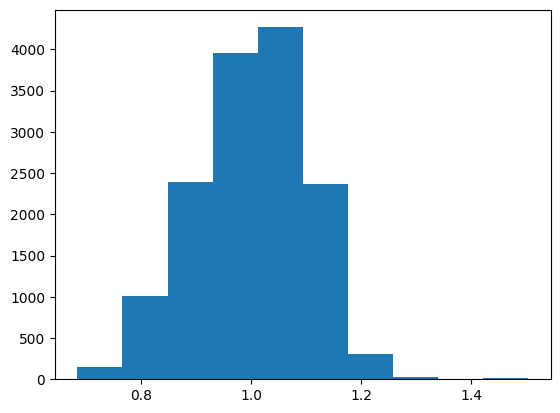

In [39]:
plt.hist(geneExprAD_transformed)

In [40]:
type(geneExprAD_transformed)

pandas.core.series.Series

In [41]:
geneExprAD_transformed.to_pickle('geneExprAD_transformed.pkl')

In [49]:
del(geneExprAD_transformed)
del(geneExprAD)

# Load Stroke Data

In [42]:
test_file = "counts_stroke.csv"

In [43]:
geneExprStroke = pd.read_csv(
            input_path + '/' + test_file,
            index_col=0)
geneExprStroke = geneExprStroke.T
geneExprStroke = geneExprStroke * 1.0

In [44]:
geneExprStroke

,Xkr4,Rp1,Sox17,Mrpl15,Lypla1,Gm37988,Tcea1,Rgs20,Atp6v1h,Oprk1,...,Tnmd,Prkag2os1,RP24-177G14.2,RP23-344G21.5,Gm11417,Hmga1-rs1,Gpr151,Adamts19,Gm17732,Vwce
stroke_AAACCCAAGACTCTTG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
stroke_AAACCCAAGCGTGTTT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
stroke_AAACCCAAGGTGCGAT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
stroke_AAACCCACAACTGCCG-1,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
stroke_AAACCCACAATCACGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
stroke_TTTGTTGTCAAGCTTG-3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
stroke_TTTGTTGTCCGTGTCT-3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
stroke_TTTGTTGTCGCATGAT-3,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
stroke_TTTGTTGTCGTTATCT-3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
geneExprStroke.dtypes

Xkr4         float64
Rp1          float64
Sox17        float64
Mrpl15       float64
Lypla1       float64
              ...   
Hmga1-rs1    float64
Gpr151       float64
Adamts19     float64
Gm17732      float64
Vwce         float64
Length: 19390, dtype: object

In [46]:
min_value = geneExprStroke.min(numeric_only=True).min()
max_value = geneExprStroke.max(numeric_only=True).max()

print("The overall range of values in the geneExprStroke dataframe is:", min_value, "to", max_value)

The overall range of values in the geneExprStroke dataframe is: 0.0 to 5522.0


# Format Stroke Data

In [50]:
if sc_imputation == True:
    magic_operator = magic.MAGIC(solver='approximate')  # Use the 'approximate' solver
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        geneExprStroke = magic_operator.fit_transform(geneExprStroke)

Calculating MAGIC...
  Running MAGIC on 34174 cells and 19390 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 36.20 seconds.
    Calculating KNN search...
    Calculated KNN search in 100.77 seconds.
    Calculating affinities...
    Calculated affinities in 98.00 seconds.
  Calculated graph and diffusion operator in 235.69 seconds.
  Calculating imputation...
  Calculated imputation in 0.59 seconds.
Calculated MAGIC in 262.72 seconds.


In [51]:
geneExprStroke

,Xkr4,Rp1,Sox17,Mrpl15,Lypla1,Gm37988,Tcea1,Rgs20,Atp6v1h,Oprk1,...,Tnmd,Prkag2os1,RP24-177G14.2,RP23-344G21.5,Gm11417,Hmga1-rs1,Gpr151,Adamts19,Gm17732,Vwce
stroke_AAACCCAAGACTCTTG-1,-0.000715,-0.000020,0.002103,0.285567,0.081593,0.002057,0.319640,-0.005972,0.201837,-0.000063,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
stroke_AAACCCAAGCGTGTTT-1,0.009647,-0.000251,0.006169,0.095670,0.036859,0.000110,0.168774,0.002154,0.138102,-0.000050,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
stroke_AAACCCAAGGTGCGAT-1,0.006008,0.000359,0.002908,0.155184,0.051989,0.000163,0.204111,0.008746,0.120023,0.000103,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
stroke_AAACCCACAACTGCCG-1,0.067335,-0.000076,0.019384,0.450017,0.128181,0.001842,0.648219,0.007136,0.420655,0.000096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
stroke_AAACCCACAATCACGT-1,0.012646,0.000185,0.025914,0.214918,0.077297,0.000196,0.334431,0.008821,0.291398,0.000194,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
stroke_TTTGTTGTCAAGCTTG-3,0.002719,-0.000118,0.026557,0.241535,0.107099,-0.000044,0.337325,0.003684,0.249041,0.000087,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
stroke_TTTGTTGTCCGTGTCT-3,0.042386,-0.000721,0.034655,0.119719,0.051937,0.000351,0.250559,0.015613,0.263013,0.000418,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
stroke_TTTGTTGTCGCATGAT-3,0.031590,-0.000162,0.003828,0.467079,0.098832,0.001028,0.502821,0.008489,0.349924,0.000084,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
stroke_TTTGTTGTCGTTATCT-3,0.005494,0.002402,0.648372,0.215751,0.088512,0.000005,0.260276,0.012438,0.158143,0.000046,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
geneExprStroke[geneExprStroke < 0] = 0
geneExprStroke

,Xkr4,Rp1,Sox17,Mrpl15,Lypla1,Gm37988,Tcea1,Rgs20,Atp6v1h,Oprk1,...,Tnmd,Prkag2os1,RP24-177G14.2,RP23-344G21.5,Gm11417,Hmga1-rs1,Gpr151,Adamts19,Gm17732,Vwce
stroke_AAACCCAAGACTCTTG-1,0.000000,0.000000,0.002103,0.285567,0.081593,0.002057,0.319640,0.000000,0.201837,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
stroke_AAACCCAAGCGTGTTT-1,0.009647,0.000000,0.006169,0.095670,0.036859,0.000110,0.168774,0.002154,0.138102,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
stroke_AAACCCAAGGTGCGAT-1,0.006008,0.000359,0.002908,0.155184,0.051989,0.000163,0.204111,0.008746,0.120023,0.000103,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
stroke_AAACCCACAACTGCCG-1,0.067335,0.000000,0.019384,0.450017,0.128181,0.001842,0.648219,0.007136,0.420655,0.000096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
stroke_AAACCCACAATCACGT-1,0.012646,0.000185,0.025914,0.214918,0.077297,0.000196,0.334431,0.008821,0.291398,0.000194,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
stroke_TTTGTTGTCAAGCTTG-3,0.002719,0.000000,0.026557,0.241535,0.107099,0.000000,0.337325,0.003684,0.249041,0.000087,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
stroke_TTTGTTGTCCGTGTCT-3,0.042386,0.000000,0.034655,0.119719,0.051937,0.000351,0.250559,0.015613,0.263013,0.000418,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
stroke_TTTGTTGTCGCATGAT-3,0.031590,0.000000,0.003828,0.467079,0.098832,0.001028,0.502821,0.008489,0.349924,0.000084,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
stroke_TTTGTTGTCGTTATCT-3,0.005494,0.002402,0.648372,0.215751,0.088512,0.000005,0.260276,0.012438,0.158143,0.000046,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
if geneExprStroke.max().max() > 50:
    geneExprStroke = (geneExprStroke + 1).apply(np.log2)  

In [54]:
geneExprStroke.to_pickle('geneExprStroke.pkl')

In [55]:
geneExprStroke_transformed = geneExprStroke.sum(axis=1)
stand = geneExprStroke_transformed.mean()
geneExprStroke_transformed = geneExprStroke_transformed / stand

In [56]:
print(geneExprStroke_transformed.shape)

(34174,)


In [57]:
geneExprStroke_transformed

stroke_AAACCCAAGACTCTTG-1    0.873472
stroke_AAACCCAAGCGTGTTT-1    0.674122
stroke_AAACCCAAGGTGCGAT-1    0.867385
stroke_AAACCCACAACTGCCG-1    1.327082
stroke_AAACCCACAATCACGT-1    1.043367
                               ...   
stroke_TTTGTTGTCAAGCTTG-3    1.190092
stroke_TTTGTTGTCCGTGTCT-3    0.831304
stroke_TTTGTTGTCGCATGAT-3    1.290084
stroke_TTTGTTGTCGTTATCT-3    0.969100
stroke_TTTGTTGTCTATCACT-3    0.804186
Length: 34174, dtype: float64

(array([  53.,  530., 2434., 6441., 8101., 5880., 7053., 2990.,  514.,
         178.]),
 array([0.42786602, 0.54122393, 0.65458183, 0.76793973, 0.88129764,
        0.99465554, 1.10801344, 1.22137135, 1.33472925, 1.44808715,
        1.56144505]),
 <BarContainer object of 10 artists>)

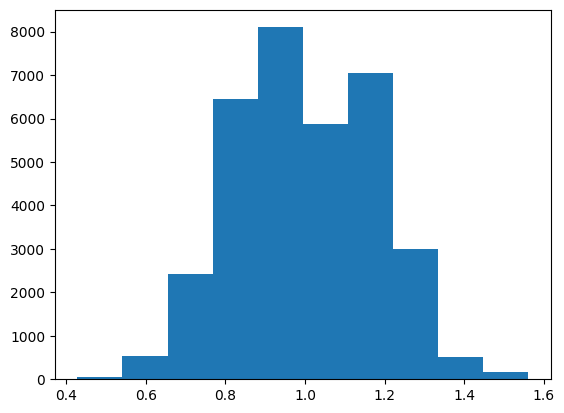

In [58]:
plt.hist(geneExprStroke_transformed)

In [59]:
type(geneExprStroke_transformed)

pandas.core.series.Series

In [60]:
geneExprStroke_transformed.to_pickle('geneExprStroke_transformed.pkl')